##讀入圖片顯示,
讀入的圖片物件型態為ndarray(N-dimensional array object)(多維度陣列物件)
這個陣列的行列數是可變的,
但陣列包含的總元素不變,
比如1*6陣列可以任意轉換成3*2,
而圖片物件ndarray實際上是一個多維的int陣列,
print type(img)會得到ndarray,
print img.dtype會傳回陣列內容的型態uint8,
將這個型態轉換成其他相容的型態(如float32)並不影響圖片呈現

In [4]:
import cv2
import numpy as np
im = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/test3.png')
h,w=im.shape[:2]
print h,w
cv2.imshow('im', im)
cv2.waitKey(0)
cv2.destroyAllWindows()

225 400


PIL套件的convert("L")是把讀入的圖片作灰階處理的方式之一,
原本RGB是三個0~255的數值,灰階圖只剩下一個0~255(黑到白),
直接對象徵灰階圖的圖片物件作加減運算就可以改變圖片的程現,如下

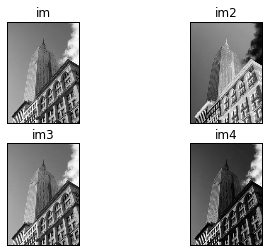

In [33]:
from PIL import Image
from numpy import *
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

im = array(Image.open("C:/Users/BIG DATA/Anaconda2/imgs/emp.jpg").convert("L"))
im2 = 255 - im #invert image
im3 = (100.0/255) * im + 100 #clamp to interval 100...200
im4 = 255.0 * (im/255.0)**2 #squared
#print int(im.min()), int(im.max())
images = [im,im2,im3,im4]
titles = ["im","im2","im3","im4"]

for i in xrange(4):
    pil_im = Image.fromarray(images[i])
    pil_im = Image.fromarray(uint8(images[i]))
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i]) #每張圖加上標題,注意matplotlib不支援中文,會當掉
    plt.xticks([]),plt.yticks([]) #隱藏XY軸
plt.show()

cv2的顏色模式轉換
cv2.cvtColor(圖物件,模式)
模式有三種:
cv2.COLOR_BGR2RGB 將BGR模式轉換成RGB模式
cv2.COLOR_BGR2GRAY 將BGR模式轉換成灰階
cv2.COLOR_GRAY2BGR 將灰階轉換成BGR模式
##注意!!cv2預設彩圖讀進來是BGR模式, CV2也只提供BGR轉灰階的方法,
但其他圖片處理套件很多都是RGB模式, 比如plt就是RGB的,
如果中途要由其他套件接手處理彩色圖片,千萬注意這個部分,
否則輸出圖片的顏色會錯誤

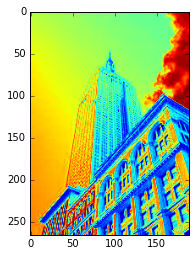

In [4]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
im = cv2.imread("C:/Users/BIG DATA/Anaconda2/imgs/emp.jpg")
RGB_im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(RGB_im,cv2.COLOR_BGR2GRAY)
BGR_im = cv2.cvtColor(gray,cv2.COLOR_GRAY2BGR)
plt.imshow(gray)

pca(主成分)分析, 可以跑但是非常吃記憶體+時間,
189*266像素的圖1張大概要十幾分鐘才會跑完, 
記憶體會吃掉超過20G,
千萬不要嘗試丟入更大的圖,你會陪電腦一起哭哭

In [2]:
from PIL import Image
from numpy import *
def pca(X):
# Principal Component Analysis
#input: X, matrix with training data stored as flattened arrays in rows
#return: projection matrix (with important dimensions first), variance and mean.

    # get dimensions
    num_data,dim = X.shape
    # center data
    mean_X = X.mean(axis=0)
    X = X - mean_X
    if dim>num_data:
        # PCA - compact trick used
        M = dot(X,X.T) # covariance matrix
        e,EV = linalg.eigh(M) # eigenvalues and eigenvectors
        tmp = dot(X.T,EV).T # this is the compact trick
        V = tmp[::-1] # reverse since last eigenvectors are the ones we want
        S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order

    for i in range(V.shape[1]):
        V[:,i] /= S
    else:
        # PCA - SVD used
        U,S,V = linalg.svd(X)
        V = V[:num_data] # only makes sense to return the first num_data
        a = [V,S,mean_X]
    # return the projection matrix, the variance and the mean
    return a

In [ ]:
from PIL import Image
from numpy import *
from pylab import *
from matplotlib import pyplot as plt
%matplotlib inline
url= "C:/Users/BIG DATA/Anaconda2/imgs/emp.jpg"
imlist = [url]

im = np.array(Image.open(imlist[0]).convert("L")) # open one image to get size
m,n = im.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open(im).convert("L")).flatten()
                    for im in imlist],"f")

# perform PCA
V,S,immean = pca(immatrix)

# show some images (mean and 7 first modes)
figure()
gray()

plt.imshow(immean.reshape(m,n))

#for i in range(7):
#    subplot(2,4,i+2)
#    imshow(V[i].reshape(m,n))
#show()

參考文件:
https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html#display-image

讀取圖片方法,傳回包含圖片檔案的物件
cv2.imread("檔案路徑",套用模式)
套用模式有三種:
1.cv2.IMREAD_COLOR RGB模式,會忽略透明度,即RGBA只辨識RGB,這是預設模式
2.cv2.IMREAD_GRAYSCALE 灰階模式,只有黑灰白
3.cv2.IMREAD_UNCHANGED RGBA模式

顯示圖片在視窗的方法
cv2.imshow("視窗名稱",讀入圖片的物件)
字串會顯示在圖片的視窗的title上, 不重要
##若想呼叫該視窗,可用視窗名稱去呼叫

設定圖片顯示多久的方法
cv2.waitKey(時間長度)
時間長度單位是millisecond,
給0的話會停住(持續保持顯示圖片的狀態)
有聆聽鍵盤輸入的功能(我還不會用)

清除此次運作程式叫出的所有視窗
cv2.destroyAllWindows()
清除指定的視窗
cv2.destroyWindow("視窗名稱")

In [31]:
import cv2
import numpy as np
im = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/witch.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imshow('testtest', im)
cv2.waitKey(0)
cv2.destroyAllWindows()


產生一個空視窗的方法
cv2.namedWindow("視窗名稱","設定視窗大小")
注意!!只要產生視窗就一定要設定cv2.waitKey(0)與cv2.destroyAllWindows()
他們是一起的!!
否則有可能會當掉or程式不正常結束!!
設定視窗大小有兩種:
1.cv2.WINDOW_AUTOSIZE 會自動調整大小,沒有圖片時顯示預設大小,這是預設值
2.cv2.WINDOW_NORMAL 這是視窗大小 = 圖片大小,沒有圖片仍先套用圖片大小

In [3]:
import cv2
import numpy as np
import time
cv2.namedWindow("koala", cv2.WINDOW_AUTOSIZE)
time.sleep(3) ##產生視窗3秒後才載入圖片
img_ko = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/koala.jpg')
cv2.imshow('koala',img_ko)
cv2.waitKey(0)
cv2.destroyAllWindows()

將圖片存檔到硬碟
cv2.imwrite("存檔路徑",圖片物件)
此方法無法執行
可能是安裝cv2不完整
error: C:\builds\master_PackSlaveAddon-win64-vc12-static\opencv\modules\imgcodecs\src\loadsave.cpp:439: error: (-2) could not find a writer for the specified extension in function cv::imwrite_

請先用python內建的方法存檔
########################
此方法可用
cv2.imwrite("存檔檔名",圖片物件)
只能給檔名(XXX.png)且必須是png格式,不能指定路徑,檔案會存在home資料夾底下
存檔成功會傳回True

In [25]:
import cv2
im = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/witch.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imwrite("witch_gray.png",im)


True

教程範例:
讀入圖片, 轉成灰階,視窗顯示圖片,
聆聽鍵盤,如果是ESC則關閉視窗,
如果是s鍵則存檔+關閉視窗

In [30]:
import numpy as np
import cv2

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/witch.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imshow('image',img)
k = cv2.waitKey(0)                        #存入變數聆聽事件
#k = cv2.waitKey(0) & 0xFF                #如果是64位元,教程建議加上 &0xFF
if k == 27:                               #27為ESC鍵的代號
    cv2.destroyAllWindows()
elif k == ord('s'):                       #字母鍵寫法ord("鍵")
    #cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()

搭配matplotlib套件
from matplotlib import pyplot

加上這行會將圖片顯示在notebook裡面:
%matplotlib inline
沒加上這行則會呼叫出matplot視窗載入圖片,
有matplot內建的存檔按鈕及其他功能可用

plt.xticks([]), plt.yticks([]) 令X與Y軸量尺為空 = 隱藏X與Y軸

注意搭配matplotlib時,
讀入圖片請寫成
img = cv2.imread("檔案路徑",0)
0表示停用cv2的顏色處理流程,
因為cv2與matplotlib的顏色處理方法不同,
沒有停用的話會造成顏色干擾, 
輸出的圖片顏色處理會錯誤

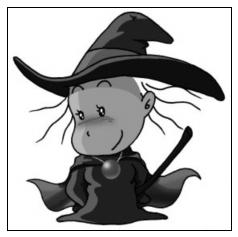

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/witch.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img = cv2.imread("檔案路徑")
沒有停用的結果如下
####################
新增:cv2.cvtColor(圖物件, cv2.COLOR_BGR2RGB)
此方法可將RGB與BGR數值互換,使得plt.imshow得到正確顏色的影像

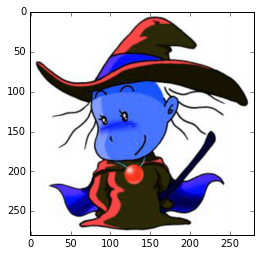

In [29]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/witch.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

參考文件:
https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners

辨識圖片內的角點(corner),哈里斯角點檢測方法
cv2.cornerHarris(灰階圖物件,blockSize,ksize,k)
此方法用於灰階圖準確度才高,所以記得先處理成灰階圖物件才傳入
此方法傳回的是角點位置圖的物件

blockSize = 標記點的大小,單位是像素

ksize = 此值必須是奇數的整數,且介於1~31之間,否則會報錯

k值是Harris Corner equation的常數項,
k越大則M越小,這會導致要更尖的角才會被辨識出來,
k=0.2已經使得90度角不一定會被辨識出來,請微量調整;此值可以小於0.1


In [21]:
import cv2
import numpy as np

filename = 'C:/Users/BIG DATA/Anaconda2/imgs/test3.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #灰階處理

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)  #計算出的角點位置圖物件存到dst變數中

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[0,0,255]
#算出是角的地方加上標記點
#門檻值0.01,意義與k值相近,此值越高則角度要越尖的才會被加上標記
#色碼順序[B,G,R],範圍0~255

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27: #按下ESC
    cv2.destroyAllWindows()

以matplotlib輸出的版本
注意RGB的順序

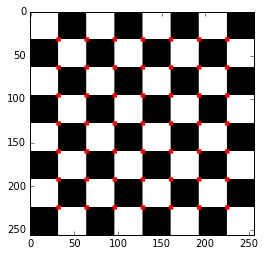

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

filename = 'C:/Users/BIG DATA/Anaconda2/imgs/ky.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #灰階處理

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04) #計算出的角點位置圖物件存到dst變數中

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255,0,0]
#matplotlib的色碼順序[R,G,B] 範圍一樣是0~255


#cv2.imshow("dst",img) #改用plt呈現結果圖片
plt.imshow(img)
#if cv2.waitKey(0) & 0xff == 27:
#   cv2.destroyAllWindows()

修正各角的標記點位置以及求出幾何中心教程範例:
角用紅點標記,refine後用綠點標記,最後算出的幾何中心以綠點標記,
圖要放很大(放大500%)才看得到點
這個範例出現底下三個新東西:
參考文件:
http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#connectedcomponents
cv2.connectedComponentsWithStats(圖片物件)
還沒搞懂這東西怎麼運作的,
目前知道這方法會傳回一個包含4個東西的list,
後三個東西是陣列物件,其中最後一個是幾何中心座標之類的數據

參考文件:
http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html
http://www.ibm.com/developerworks/cn/opensource/os-cn-spark-practice4/
criteria = (type,max_iter,epsilon)
這個方法的寫法固定是寫這樣的,
解釋這個方法之前要先複習Kmean分群怎麼做的?
忘記的人請看第二個參考文件,或是去K課本...
簡單的說有4個步驟:
1.選擇K個初始點當作中心點
2.把其餘的點都對中心點計算距離,把距離相近的分作一群
3.分好群後重新計算每個群內部的距離平均值作為新的中心點
4.重複2與3直到滿足終止條件為止.
終止條件通常有3種:
1.中心不再移動
2.重複循環已達設定的上限次數
3.中心移動幅度小於設定的門檻值
那麼現在可以看看方法右邊的參數是什麼?
max_iter = 最大循環次數,常見10~100次
epsilon = 中心移動幅度,常見0.01~10
type代表終止循環的類型,有3種可選:
1.cv2.TERM_CRITERIA_EPS 表示終止條件以epsilon為主
2.cv2.TERM_CRITERIA_MAX_ITER 表示終止條件以max_iter為主
3.cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER 表示上述兩種條件達成其中之一就終止

參考文件:
http://blog.csdn.net/sunshine_in_moon/article/details/45440205
http://wiki.opencv.org.cn/index.php/Cv%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86#CornerHarris
cv2.cornerSubPix(圖片物件, 角點圖物件, winSize, zeroZone, criteria)
此方法會微調哈里斯角點檢測方法的結果來提高精準度.
winSize=(x,y)分群區域大小,是方形區域,面積定義為(2x+1)*(2y+1)
zeroZone=(x,y)不檢測的區域大小,用來避開可能的極端值/奇異點;設定(-1,-1)表示不設此區域
criteria=如前述,kmean分群終止條件


參考文件:
http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.hstack.html
http://blog.csdn.net/huruzun/article/details/39801217
np.hstack((a陣列,b陣列))
將兩個陣列橫向組合成一個陣列傳回

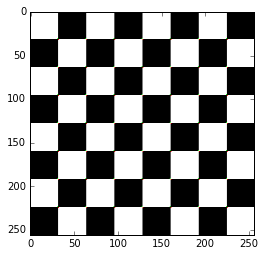

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

filename = 'C:/Users/BIG DATA/Anaconda2/imgs/ky.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray) #灰階圖物件ndarray的內容形態設定成float,精度32位元
dst = cv2.cornerHarris(gray,2,3,0.01) #找出角點
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0) #篩出角點的區域
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[255,0,0]
img[res[:,3],res[:,2]] = [0,255,0]

#cv2.imwrite('subpixel5.png',img)
plt.imshow(img)

哈里斯角點檢測方法對於影像尺度大小是敏感的,意思是說當圖很小的時候,"角"的定義是明確的;
但是當這張圖被放大數倍的時候,"角"可能就變成"曲線",
哈里斯角點檢測方法可能無法辨識了;
更大倍數的時候(比如放大數百倍),曲線也可能會被當成直線了.
但是影像處理上常常需要放大檢視,因此一個能夠克服圖像放大後還能運作的方法是很重要的..
Distinctive Image Features from Scale-Invariant Keypoints這方法就是用來搞定這問題的
這是尋找所謂的"關鍵特徵點"的方法
參考資料:
http://docs.opencv.org/trunk/da/df5/tutorial_py_sift_intro.html#gsc.tab=0
xfeatures2d屬於擴充模組,要另外編譯到opencv才能用(opencv3.0)
##################
請檢查安裝的cv版本
在python下執行這兩行:
import cv2
cv2.__version__
如果不是cv3.0以上的版本,就可以執行底下的code

In [13]:
import cv2
cv2.__version__

'2.4.12'

True

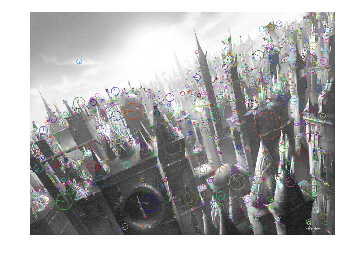

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
     
img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/1000_Ravnica-Plains.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT()
kp = sift.detect(gray,None)   
img1=cv2.drawKeypoints(gray,kp)
img2=cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#imgs = [img1,img2]
plt.axis("off")
plt.imshow(img2)
#for i in xrange(2):
#    plt.subplot(1,2,i+1)
#    plt.imshow(imgs[i],'gray')
#    plt.axis("off")
#plt.show()
cv2.imwrite('sift_keypoints.jpg',img2)

參考文件:
http://docs.opencv.org/trunk/d7/d4d/tutorial_py_thresholding.html#gsc.tab=0
cv2.threshold(灰階圖物件,篩選門檻值,最大值,最小值,使用模式)
門檻值為像素顏色0~255,因為只能傳入灰階圖,所以是區別黑-灰-白用的方法
###數值越低越接近黑色###
最大值或最小值不一定要都給,可以只給其中之一
門檻值越低=要更黑的才會被認作是黑色
模式有5種,請直接參考輸出效果
cv2.THRESH_BINARY:二分法,低於門檻值的視為黑色,否則是白色
cv2.THRESH_TRUNC: 還沒搞懂,可能是大於門檻值的都視為白色,其餘不變
cv2.THRESH_TOZERO: 門檻值以下視為黑色,以上的不變
INV輸出結果為反向選取,大於門檻值的視為黑色

參考文件:
http://blog.csdn.net/liqiang19910328/article/details/42761677
http://www.cnblogs.com/wei-li/archive/2012/05/23/2506940.html
將數張圖合併成一張圖輸出的方法
plt.subplot(numRows,numCols,plotNum)
numRows此圖合併了幾行
numCols此圖合併了幾列
plotNum第幾個格子,##左上格子為1號##
可配合plt.imshow(陣列[i])將陣列取出的圖片塞進去指定格子

<type 'float'>


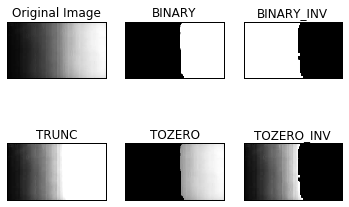

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/blck_white_gradient.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
#ret為float型態的變數(retvalue,retval.),用來代表通過門檻後的灰階圖深淺值分布
#逗號後面是物件名稱(通過門檻值的圖物件)
#此範例設定門檻值127,最大值255

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
#輸出的圖片標題

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
#將圖片物件放入物件陣列

for i in xrange(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i]) #每張圖加上標題,注意matplotlib不支援中文,會當掉
    plt.xticks([]),plt.yticks([]) #隱藏XY軸
plt.show()

利用門檻值作對低畫質圖片進行釐清辨識
結合其他函數去取得門檻值(一個變動值)而非直接寫死門檻值,會得到更好的釐清效果
cv2.adaptiveThreshold(灰階物件,最大值,函數方法,Block Size,C)
函數方法有2種:
cv2.ADAPTIVE_THRESH_MEAN_C:
由鄰近區域的深淺平均值作為門檻值,Block Size決定鄰近區域大小,C為門檻值上下加減的範圍
cv2.ADAPTIVE_THRESH_GAUSSIAN_C:
由鄰近區域的深淺去計算高思函數的權重值總合做為門檻值,Block Size與C如前述

參考文件:
http://www.cnblogs.com/denny402/p/3848316.html
cv2.medianBlur(圖片物件,ksize)
blur為平滑/模糊化處理,
由鄰近區域求出中位數,將該區域的顏色都以此中位數替代,
ksize定義範圍大小,
此值必須是奇數整數,否則會報錯
其他模糊處理方法請自行查看文件

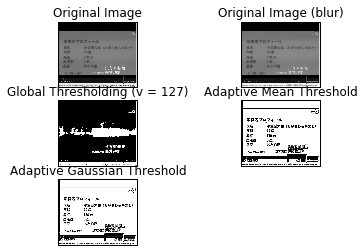

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/A01.jpg',0)
img_blur = cv2.medianBlur(img,5) #模糊處理

ret,th1 = cv2.threshold(img_blur,127,255,cv2.THRESH_BINARY)
#二分法門檻

th2 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
#中位數門檻

th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#高斯權重值門檻

titles = ['Original Image','Original Image (blur)', 'Global Thresholding (v = 127)',
             'Adaptive Mean Threshold', 'Adaptive Gaussian Threshold']
images = [img, img_blur, th1, th2, th3] 

for i in xrange(5):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

利用門檻值概念實作驗證碼內的雜訊清除

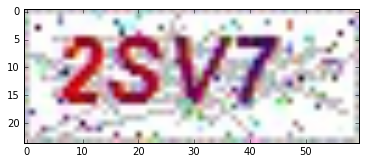

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/Captcha.jpg')
plt.imshow(img) #show出驗證碼截圖

##去除雜訊(噪音點/線,噪點/線)的做法##
參考文件:
http://docs.opencv.org/trunk/d7/d4d/tutorial_py_thresholding.html#gsc.tab=0
奧茲二分法(Otsu’s Binarization)
單純的灰階圖片在計算灰階深淺上應該會有一個非常高的波峰,
因為有圖形的部分顏色很黑,
噪點/線的顏色較淺,
##注意跟前面門檻值越低越黑的定義相反##
(請參考histogran的結果)
這會導致雜訊點/線會自己一組去產生另一個波峰,
接著設定門檻值,將不要的組別去除就能達到清除的目的;

奧茲二分法會找出兩個峰谷之間的界線切開,
利用此特性當作門檻值,
把雜訊的波峰段去除

在門檻值方法內引用奧茲二分法:
cv2.threshold(灰階圖物件,篩選門檻值,最大值/最小值,使用模式)
篩選門檻值一定要設為0,
模式設定為cv2.THRESH_BINARY+cv2.THRESH_OTSU,
參考文件原文:
"For this, our cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero."

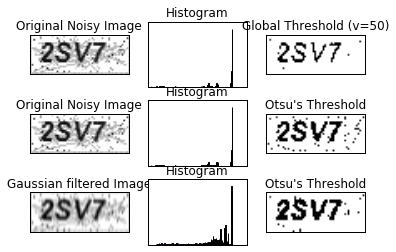

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/Captcha.jpg',cv2.IMREAD_GRAYSCALE)

# global thresholding
ret1,th1 = cv2.threshold(img,50,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(1,3),0) #高斯模糊方法,請參考前面模糊方法的文件
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img, 0, th1,
           img, 0, th2,
           blur, 0, th3]  
#長條圖hist()方法為matplot內建繪圖,只需要在陣列內預留組合圖的空位,不用塞物件進去

titles = ['Original Noisy Image','Histogram','Global Threshold (v=50)',
           'Original Noisy Image','Histogram',"Otsu's Threshold",
           'Gaussian filtered Image','Histogram',"Otsu's Threshold"]
 
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    #注意不是取出圖片物件plt.show出來;而是繪製圖片plt.hist放進去
    
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

python版調色盤小程式
參考資料:
http://docs.opencv.org/trunk/d7/dfc/group__highgui.html#gaf78d2155d30b728fc413803745b67a9b&gsc.tab=0
http://docs.opencv.org/trunk/d9/dc8/tutorial_py_trackbar.html#gsc.tab=0
cv2.createTrackbar("bar名稱","視窗名稱",bar初始值,bar最大值,傳入資料物件)
cv2.getTrackbarPos("bar名稱","視窗名稱")

In [1]:
import cv2
import numpy as np
 
def nothing(x):
    pass
 
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
 
# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF\n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)
 
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break 
    #get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
 
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
    
cv2.destroyAllWindows()


利用kmean分群實作把一張圖的顏色分群
原範例是在linux上執行的(註解的數行),所以略加修改;
參考資料:
http://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/

關於image.shape:
參考資料:
http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_basic_ops/py_basic_ops.html
圖片物件的屬性基本上會有行數,列數,著色通道,像素等等;
在opencv,image.shape是一個包含2或3個元素的陣列,
前兩個元素是行數,列數,第三個元素是著色通道,但灰階圖片則不存在著色通道這個元素;
因此也可以透過檢查image.shape去判斷圖片是否為灰階圖

陣列.reshape(x,y)
將陣列元素重新排列成x*y的陣列

KMeans(n_clusters = K)
Kmean分群法,K值表示會分出多少群,
但K設定過高也可能分不出如此多的群數.
在本範例中,K表示圖片的顏色將被分成多少組不同的色彩類型,
K設越大需要運算的時間越久,
測試圖大小為1000*734,設定K =10需要運算數分鐘才有結果

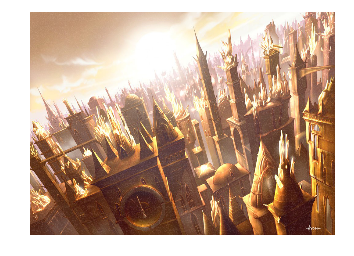

In [31]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2
%matplotlib inline

image = "C:/Users/BIG DATA/Anaconda2/imgs/1000_Ravnica-Plains.jpg"
 
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required = True, help = "Path to the image")
#ap.add_argument("-c", "--clusters", required = True, type = int,
#	help = "# of clusters")
#args = vars(ap.parse_args())
 
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# show our image
#plt.figure()
plt.axis("off") #隱藏X與Y軸
plt.imshow(image)

# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))
plt.imshow(image)
# cluster the pixel intensities
clt = KMeans(n_clusters = 5)
clt.fit(image)

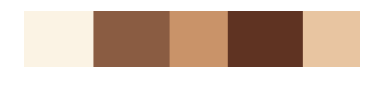

In [29]:
# import the necessary packages
import numpy as np
import cv2
 
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
 
	# return the histogram
	return hist

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
 
# show our color bart
#plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

影像疊合
參考文件:
http://docs.opencv.org/trunk/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19&gsc.tab=0
http://docs.opencv.org/trunk/d0/d86/tutorial_py_image_arithmetics.html#gsc.tab=0
將兩個圖像疊合,可設定透明度
cv2.addWeighted(圖1,透明度1,圖2,透明度2,gamma值)

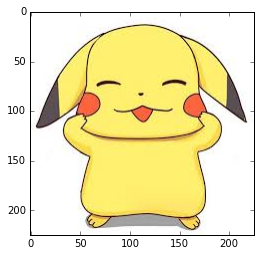

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img1 = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/pi.jpg')
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

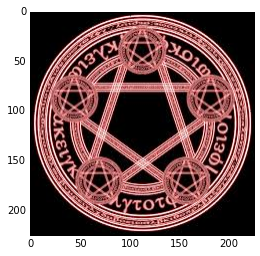

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img2 = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/mag.jpg')
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

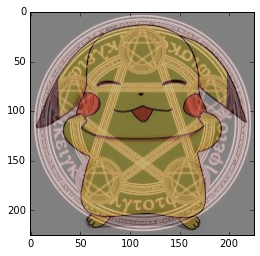

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img1 = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/pi.jpg')
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/mag.jpg')
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
dst = cv2.addWeighted(img1,0.5,img2,0.3,0)
plt.imshow(dst)


在圖上指定區域
Setting Region of Image (ROI)
圖物件[x1:x2,y1:y2]
x與y都是座標,圖的左上角為(0,0),與CSS相同

參考資料:
http://docs.opencv.org/trunk/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19&gsc.tab=0
http://docs.opencv.org/trunk/d0/d86/tutorial_py_image_arithmetics.html#gsc.tab=0
進階圖片疊合處理:
bitwise_and,bitwise_or,bitwise_not,bitwise_xor
這些方法處理之前需要定義遮罩(mask),
遮罩的圖像通常會呈現全黑或全白,
方法參數都是(圖物件1,圖物件2,mask)
基本上就是兩圖取聯集扣除遮罩或取交集扣除遮罩之類的處理,
詳細請看參考資料

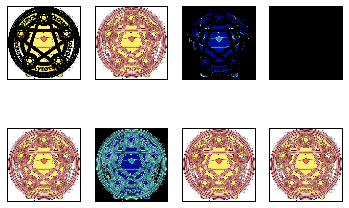

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img1 = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/pi.jpg')
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/mag.jpg')
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img1_and_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
img2_and_fg = cv2.bitwise_and(img2,img2,mask = mask)

img1_not_bg = cv2.bitwise_not(roi,roi,mask = mask_inv)
img2_not_fg = cv2.bitwise_not(img2,img2,mask = mask)

img1_or_bg = cv2.bitwise_or(roi,roi,mask = mask_inv)
img2_or_fg = cv2.bitwise_or(img2,img2,mask = mask)

img1_xor_bg = cv2.bitwise_xor(roi,roi,mask = mask_inv)
img2_xor_fg = cv2.bitwise_xor(img2,img2,mask = mask)

dst1 = cv2.add(img1_and_bg,img2_and_fg)
imgr1 = img1[0:rows, 0:cols ] = dst1

dst2 = cv2.add(img1_or_bg,img2_or_fg)
imgr2 = img1[0:rows, 0:cols ] = dst2

dst3 = cv2.add(img1_and_bg,img2_and_fg)
imgr3 = img1[0:rows, 0:cols ] = dst3

dst4 = cv2.add(img1_and_bg,img2_and_fg)
imgr4 = img1[0:rows, 0:cols ] = dst4

images = [img1_and_bg,img1_not_bg,img1_or_bg,img1_xor_bg,
         imgr1,imgr2,imgr3,imgr4]

for i in xrange(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

##
參考資料(code是opencv3.0以上的寫法):
http://my.oschina.net/u/2306127/blog/626463?fromerr=S3oUBJ0R

終極教程範例-用兩種機器學習(SVM and KNearest)方式分別學習扭曲的數字影像,
最後辨識測試組輸出(prediction),
可應用於辨識去掉雜訊(步驟請參考前面的threshold)的驗證碼,
請自己嘗試練習組合這些程序,最後抽換掉測試組就可以了
需要訓練組圖形的請跟我說
底下是訓練組圖形,
包含5000個歪斜數字(0~9各500個)

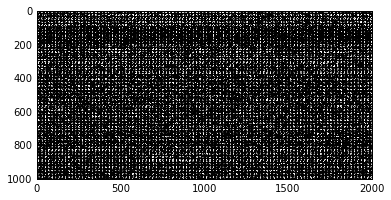

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/digits.png')

plt.imshow(img)

In [4]:
#!/usr/bin/env python

'''
SVM and KNearest digit recognition.

Sample loads a dataset of handwritten digits from 'digits.png'.
Then it trains a SVM and KNearest classifiers on it and evaluates
their accuracy.

Following preprocessing is applied to the dataset:
 - Moment-based image deskew (see deskew())
 - Digit images are split into 4 10x10 cells and 16-bin
   histogram of oriented gradients is computed for each
   cell
 - Transform histograms to space with Hellinger metric (see [1] (RootSIFT))


[1] R. Arandjelovic, A. Zisserman
    "Three things everyone should know to improve object retrieval"
    http://www.robots.ox.ac.uk/~vgg/publications/2012/Arandjelovic12/arandjelovic12.pdf

Usage:
   digits.py
'''
import itertools as it
import numpy as np
import cv2
from multiprocessing.pool import ThreadPool
#from common import clock, mosaic
from numpy.linalg import norm


SZ = 20 # size of each digit is SZ x SZ
CLASS_N = 10
DIGITS_FN = 'C:/Users/BIG DATA/Anaconda2/imgs/digits.png'

def clock():
    return cv2.getTickCount() / cv2.getTickFrequency()

def mosaic(w, imgs):  
    '''Make a grid from images.

    w    -- number of grid columns
    imgs -- images (must have same size and format)
    '''
    imgs = iter(imgs)
    img0 = imgs.next()
    pad = np.zeros_like(img0)
    imgs = it.chain([img0], imgs)
    rows = grouper(w, imgs, pad)
    return np.vstack(map(np.hstack, rows))

def grouper(n, iterable, fillvalue=None):
    '''grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx'''
    args = [iter(iterable)] * n
    return it.izip_longest(fillvalue=fillvalue, *args)


def split2d(img, cell_size, flatten=True):
    h, w = img.shape[:2]
    sx, sy = cell_size
    cells = [np.hsplit(row, w//sx) for row in np.vsplit(img, h//sy)]
    cells = np.array(cells)
    if flatten:
        cells = cells.reshape(-1, sy, sx)
    return cells

def load_digits(fn):  #讀入訓練組大圖,並分割成單一數字的小圖,分割出訓練組(digits)測試組(labels)
    print 'loading "%s" ...' % fn
    digits_img = cv2.imread(fn, 0)
    digits = split2d(digits_img, (SZ, SZ))
    labels = np.repeat(np.arange(CLASS_N), len(digits)/CLASS_N)
    return digits, labels

def deskew(img): #將歪斜字體矯正
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    return img

class StatModel(object):
    def load(self, fn):
        self.model.load(fn)
    def save(self, fn):
        self.model.save(fn)

class KNearest(StatModel): #呼叫cv2.Knearest方法
    def __init__(self, k = 3):
        self.k = k
        self.model = cv2.KNearest()

    def train(self, samples, responses):
        self.model = cv2.KNearest()
        self.model.train(samples, responses)

    def predict(self, samples):
        retval, results, neigh_resp, dists = self.model.find_nearest(samples, self.k)
        return results.ravel()

class SVM(StatModel): #呼叫cv2.SVM方法
    def __init__(self, C = 1, gamma = 0.5):
        self.params = dict( kernel_type = cv2.SVM_RBF,
                            svm_type = cv2.SVM_C_SVC,
                            C = C,
                            gamma = gamma )
        self.model = cv2.SVM()

    def train(self, samples, responses):
        self.model = cv2.SVM()
        self.model.train(samples, responses, params = self.params)

    def predict(self, samples):
        return self.model.predict_all(samples).ravel()


def evaluate_model(model, digits, samples, labels): #讀入訓練後的資料與測試組,計算辨識不出來的比例(error)
    resp = model.predict(samples)
    print "prediction:"
    print resp
    err = (labels != resp).mean()
    print 'error: %.2f %%' % (err*100)

    confusion = np.zeros((10, 10), np.int32)
    for i, j in zip(labels, resp):
        confusion[i, j] += 1
    print 'confusion matrix:'
    print confusion
    print

    vis = []
    for img, flag in zip(digits, resp == labels):
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        if not flag:
            img[...,:2] = 0
        vis.append(img)
    return mosaic(25, vis)

def preprocess_simple(digits):
    return np.float32(digits).reshape(-1, SZ*SZ) / 255.0

def preprocess_hog(digits):
    samples = []
    for img in digits:
        gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
        gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
        mag, ang = cv2.cartToPolar(gx, gy)
        bin_n = 16
        bin = np.int32(bin_n*ang/(2*np.pi))
        bin_cells = bin[:10,:10], bin[10:,:10], bin[:10,10:], bin[10:,10:]
        mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
        hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
        hist = np.hstack(hists)

        # transform to Hellinger kernel
        eps = 1e-7
        hist /= hist.sum() + eps
        hist = np.sqrt(hist)
        hist /= norm(hist) + eps

        samples.append(hist)
    return np.float32(samples)


if __name__ == '__main__':
    print __doc__

    digits, labels = load_digits(DIGITS_FN)

    print 'preprocessing...'
    # shuffle digits
    rand = np.random.RandomState(321)
    shuffle = rand.permutation(len(digits))
    digits, labels = digits[shuffle], labels[shuffle]

    digits2 = map(deskew, digits)
    samples = preprocess_hog(digits2)

    train_n = int(0.9*len(samples))
    cv2.imshow('test set', mosaic(25, digits[train_n:]))
    digits_train, digits_test = np.split(digits2, [train_n])
    samples_train, samples_test = np.split(samples, [train_n])
    labels_train, labels_test = np.split(labels, [train_n])


    print 'training KNearest...'
    model = KNearest(k=4)
    model.train(samples_train, labels_train)
    vis = evaluate_model(model, digits_test, samples_test, labels_test)
    cv2.imshow('KNearest test', vis)

    print 'training SVM...'
    model = SVM(C=2.67, gamma=5.383)
    model.train(samples_train, labels_train)
    vis = evaluate_model(model, digits_test, samples_test, labels_test)
    cv2.imshow('SVM test', vis)
    print 'saving SVM as "digits_svm.dat"...'
    model.save('digits_svm.dat')

    cv2.waitKey(0)



SVM and KNearest digit recognition.

Sample loads a dataset of handwritten digits from 'digits.png'.
Then it trains a SVM and KNearest classifiers on it and evaluates
their accuracy.

Following preprocessing is applied to the dataset:
 - Moment-based image deskew (see deskew())
 - Digit images are split into 4 10x10 cells and 16-bin
   histogram of oriented gradients is computed for each
   cell
 - Transform histograms to space with Hellinger metric (see [1] (RootSIFT))


[1] R. Arandjelovic, A. Zisserman
    "Three things everyone should know to improve object retrieval"
    http://www.robots.ox.ac.uk/~vgg/publications/2012/Arandjelovic12/arandjelovic12.pdf

Usage:
   digits.py

loading "C:/Users/BIG DATA/Anaconda2/imgs/digits.png" ...
preprocessing...
training KNearest...
prediction:
[ 0.  7.  4.  0.  0.  8.  3.  0.  6.  9.  7.  1.  7.  3.  3.  5.  3.  5.
  1.  8.  6.  1.  1.  0.  8.  8.  0.  6.  6.  1.  0.  7.  0.  6.  7.  7.
  8.  0.  2.  3.  0.  2.  2.  1.  4.  1.  7.  1.  0.  9.

C:\Users\BIG DATA\Anaconda2\lib\site-packages\ipykernel\__main__.py:128: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Help on package common:

NAME
    common

FILE
    c:\users\big data\anaconda2\lib\site-packages\common\__init__.py

PACKAGE CONTENTS
    term (package)




尚未完工

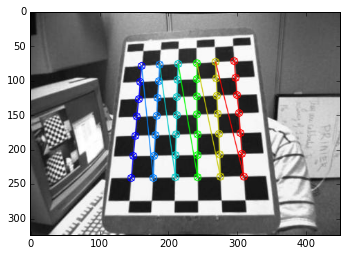

In [45]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
   
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('*.jpg')

#for fname in images:
img = cv2.imread("C:/Users/BIG DATA/Anaconda2/imgs/calib_result.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (7,6),None)
    
# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)
    
    cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    imgpoints.append(corners)
    
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (7,6), corners,ret)
plt.imshow(img)

In [5]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
    
#fname = glob.glob('C:/Users/BIG DATA/Anaconda2/imgs/calib_result.jpg')
img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/calib_result.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (7,6),None)
    
if ret == True:
    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

    # Find the rotation and translation vectors.
    rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners, mtx, dist)
        
    # project 3D points to image plane
    imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)

    img = draw(img,corners,imgpts)
    img = np.float32(img)
plt.imshow(img)

NameError: name 'objpoints' is not defined

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread("C:/Users/BIG DATA/Anaconda2/imgs/alstar.jpg")  #queryimage # left image
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("C:/Users/BIG DATA/Anaconda2/imgs/star.jpg") #trainimage # right image
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
sift = cv2.SIFT()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []
pts3 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        
#pts1 = np.int32(pts1)
#pts2 = np.int32(pts2)
pts1 = np.float32(pts1)
pts2 = np.float32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
        return img1,img2

# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(img2)
plt.show()

ValueError: too many values to unpack

'2.4.12'

In [ ]:
import glob
import os
import sys
 
from PIL import Image
 
EXTS = 'jpg', 'jpeg', 'JPG', 'JPEG', 'gif', 'GIF', 'png', 'PNG'
 
def avhash(im):
    if not isinstance(im, Image.Image):
        im = Image.open(im)
    im = im.resize((8, 8), Image.ANTIALIAS).convert('L')
    avg = reduce(lambda x, y: x + y, im.getdata()) / 64.
    return reduce(lambda x, (y, z): x | (z << y),
                  enumerate(map(lambda i: 0 if i < avg else 1, im.getdata())),
                  0)
 
def hamming(h1, h2):
    h, d = 0, h1 ^ h2
    while d:
        h += 1
        d &= d - 1
    return h
 
if __name__ == '__main__':
    if len(sys.argv) <= 1 or len(sys.argv) > 3:
        print "Usage: %s image.jpg [dir]" % sys.argv[0]
    else:
        im, wd = sys.argv[1], '.' if len(sys.argv) < 3 else sys.argv[2]
        h = avhash(im)
 
        os.chdir(wd)
        images = []
        for ext in EXTS:
            images.extend(glob.glob('*.%s' % ext))
 
        seq = []
        prog = int(len(images) > 50 and sys.stdout.isatty())
        for f in images:
            seq.append((f, hamming(avhash(f), h)))
            if prog:
                perc = 100. * prog / len(images)
                x = int(2 * perc / 5)
                print '\rCalculating... [' + '#' * x + ' ' * (40 - x) + ']',
                print '%.2f%%' % perc, '(%d/%d)' % (prog, len(images)),
                sys.stdout.flush()
                prog += 1
 
        if prog: print
        for f, ham in sorted(seq, key=lambda i: i[1]):
            print "%d\t%s" % (ham, f)
